Most # by station
\# by time frame
\# by line?

What are the busiest stations?
Where are people coming in? Where are people exiting?

Total by station?

What's the most busy data?

Further research:
    I would really like to know the gender of the people who are entering 

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics
import tkinter as tk
from tkinter import filedialog
from pandas import DataFrame
%matplotlib inline

# Set up the data
df = pd.read_csv('turnstile-usage-data-2018.csv', parse_dates=['Date'])

# Strip and make column names lowercase so that they are easy to manage. 
df.columns = df.columns.str.strip().str.lower()
# Replace characters or remove spaces and make all words lowercase.
df.columns = df.columns.str.replace(' ', '_').str.replace('/', '_').str.replace('(', '').str.replace(')', '')

#Sort data such that each value 
df = df.sort_values(by=['c_a','unit', 'scp', 'date', 'time'],ascending = [True, True, True, False, False])

# What's inside the file? Let's take a preview.
column_names = list(df.columns.values) 
print(column_names)
print(df.head())

#Be aware, the file is big so this process will take some time.

['c_a', 'unit', 'scp', 'station', 'line_name', 'division', 'date', 'time', 'description', 'entries', 'exits']
        c_a  unit       scp station line_name division       date      time  \
54105  A002  R051  02-00-00   59 ST   NQR456W      BMT 2018-12-28  23:00:00   
54110  A002  R051  02-00-00   59 ST   NQR456W      BMT 2018-12-28  23:00:00   
44681  A002  R051  02-00-00   59 ST   NQR456W      BMT 2018-12-28  19:00:00   
44689  A002  R051  02-00-00   59 ST   NQR456W      BMT 2018-12-28  19:00:00   
35219  A002  R051  02-00-00   59 ST   NQR456W      BMT 2018-12-28  15:00:00   

      description  entries    exits  
54105     REGULAR  6889241  2335912  
54110     REGULAR  6889241  2335912  
44681     REGULAR  6888883  2335887  
44689     REGULAR  6888883  2335887  
35219     REGULAR  6888126  2335817  


In [89]:
df.describe()
#We are still working with the full dataset so runtime is a bit high. We'll cut that down shortly.

,entries,exits
count,1.011147e+07,1.011147e+07
mean,3.961658e+07,3.258595e+07
std,2.058149e+08,1.904601e+08
min,0.000000e+00,0.000000e+00
25%,4.929705e+05,2.377950e+05
50%,2.527592e+06,1.426439e+06
75%,6.916714e+06,4.814437e+06
max,2.144893e+09,2.146093e+09


Clearly there is too much data here; we have here approximately 10 million data points to work with. Perhaps we can benefit from looking at a subset of the data. Let's take a slice of our data.

In [90]:
# Set ipython's max row display
# Set iPython's max column width to 50
pd.set_option('display.max_columns', 50)

#List of unique values in the df['name'] column
for column_name in column_names:
    print("There are " + str(df[column_name].nunique()) + " unique values in column \'" + column_name + "\'.")

There are 749 unique values in column 'c_a'.
There are 470 unique values in column 'unit'.
There are 229 unique values in column 'scp'.
There are 379 unique values in column 'station'.
There are 114 unique values in column 'line_name'.
There are 6 unique values in column 'division'.
There are 350 unique values in column 'date'.
There are 85415 unique values in column 'time'.
There are 2 unique values in column 'description'.
There are 5701728 unique values in column 'entries'.
There are 5039144 unique values in column 'exits'.


In [91]:
#  Let's select the station that we're interested in.
station_name = "14 ST-UNION SQ"

# make new data frames to avoid hidden chaining
df_station = df[df.station == station_name].copy()
print(df_station.shape)

(81803, 11)


81803 values are a lot easier to deal with than 1.011147e+07
Let's get cracking...

In [92]:
#What's the data look like now?
df_station.head(40)

,c_a,unit,scp,station,line_name,division,date,time,description,entries,exits
49738,A033,R170,02-00-00,14 ST-UNION SQ,LNQR456W,BMT,2018-12-28,20:00:00,REGULAR,2056902,5179086
49748,A033,R170,02-00-00,14 ST-UNION SQ,LNQR456W,BMT,2018-12-28,20:00:00,REGULAR,2056902,5179086
40335,A033,R170,02-00-00,14 ST-UNION SQ,LNQR456W,BMT,2018-12-28,16:00:00,REGULAR,2056575,5178313
40343,A033,R170,02-00-00,14 ST-UNION SQ,LNQR456W,BMT,2018-12-28,16:00:00,REGULAR,2056575,5178313
30260,A033,R170,02-00-00,14 ST-UNION SQ,LNQR456W,BMT,2018-12-28,12:00:00,REGULAR,2056373,5177665
30261,A033,R170,02-00-00,14 ST-UNION SQ,LNQR456W,BMT,2018-12-28,12:00:00,REGULAR,2056373,5177665
18957,A033,R170,02-00-00,14 ST-UNION SQ,LNQR456W,BMT,2018-12-28,08:00:00,REGULAR,2056286,5177145
18965,A033,R170,02-00-00,14 ST-UNION SQ,LNQR456W,BMT,2018-12-28,08:00:00,REGULAR,2056286,5177145
9473,A033,R170,02-00-00,14 ST-UNION SQ,LNQR456W,BMT,2018-12-28,04:00:00,REGULAR,2056274,5177048
9483,A033,R170,02-00-00,14 ST-UNION SQ,LNQR456W,BMT,2018-12-28,04:00:00,REGULAR,2056274,5177048


In [93]:
df_station_cleaned = df_station.drop_duplicates().copy()
print(df_station.shape, df_station_cleaned.shape, df_station.shape[0] - df_station_cleaned.shape[0])

(81803, 11) (79966, 11) 1837


We removed 1837 duplicate values in this dataframe.

In [94]:
df_station_cleaned.head()

,c_a,unit,scp,station,line_name,division,date,time,description,entries,exits
49738,A033,R170,02-00-00,14 ST-UNION SQ,LNQR456W,BMT,2018-12-28,20:00:00,REGULAR,2056902,5179086
40335,A033,R170,02-00-00,14 ST-UNION SQ,LNQR456W,BMT,2018-12-28,16:00:00,REGULAR,2056575,5178313
30260,A033,R170,02-00-00,14 ST-UNION SQ,LNQR456W,BMT,2018-12-28,12:00:00,REGULAR,2056373,5177665
18957,A033,R170,02-00-00,14 ST-UNION SQ,LNQR456W,BMT,2018-12-28,08:00:00,REGULAR,2056286,5177145
9473,A033,R170,02-00-00,14 ST-UNION SQ,LNQR456W,BMT,2018-12-28,04:00:00,REGULAR,2056274,5177048


In [14]:
root= tk.Tk()

canvas1 = tk.Canvas(root, width = 200, height = 200, bg = 'lightsteelblue2', relief = 'raised')
canvas1.pack()

def exportCSV ():
    global df_station_cleaned
    
    export_file_path = filedialog.asksaveasfilename(defaultextension='.csv')
    df_station_cleaned.to_csv (export_file_path, index = None, header=True)

saveAsButton_CSV = tk.Button(text='Export CSV', command=exportCSV, bg='white', fg='blue', font=('helvetica', 12, 'bold'))
canvas1.create_window(100, 100, window=saveAsButton_CSV)

root.mainloop()

# We could also try:
# export_csv = df.to_csv (r'new_data_2018.csv', index = None, header=True)
# This is just a fancier way, using a GUI to save the file in a way that users will be familiar with.


In [124]:
df_station_cleaned.head(20)
print(df_station_cleaned.shape)
df_station_cleaned2 = df_station_cleaned[df_station_cleaned["description"] == "REGULAR"].copy()
print(df_station_cleaned2.shape)
df_station_cleaned2.head(20)


(79966, 11)
(79468, 11)


,c_a,unit,scp,station,line_name,division,date,time,description,entries,exits
49738,A033,R170,02-00-00,14 ST-UNION SQ,LNQR456W,BMT,2018-12-28,20:00:00,REGULAR,2056902,5179086
40335,A033,R170,02-00-00,14 ST-UNION SQ,LNQR456W,BMT,2018-12-28,16:00:00,REGULAR,2056575,5178313
30260,A033,R170,02-00-00,14 ST-UNION SQ,LNQR456W,BMT,2018-12-28,12:00:00,REGULAR,2056373,5177665
18957,A033,R170,02-00-00,14 ST-UNION SQ,LNQR456W,BMT,2018-12-28,08:00:00,REGULAR,2056286,5177145
9473,A033,R170,02-00-00,14 ST-UNION SQ,LNQR456W,BMT,2018-12-28,04:00:00,REGULAR,2056274,5177048
3,A033,R170,02-00-00,14 ST-UNION SQ,LNQR456W,BMT,2018-12-28,00:00:00,REGULAR,2056268,5177036
107253,A033,R170,02-00-00,14 ST-UNION SQ,LNQR456W,BMT,2018-12-27,20:00:00,REGULAR,2056128,5176874
97629,A033,R170,02-00-00,14 ST-UNION SQ,LNQR456W,BMT,2018-12-27,16:00:00,REGULAR,2055677,5176081
87813,A033,R170,02-00-00,14 ST-UNION SQ,LNQR456W,BMT,2018-12-27,12:00:00,REGULAR,2055443,5175272
78212,A033,R170,02-00-00,14 ST-UNION SQ,LNQR456W,BMT,2018-12-27,08:00:00,REGULAR,2055373,5174751


In [125]:
# What's inside each column?
column_names2 = list(df_station_cleaned2.columns.values) 
print(column_names2)

for column_name in column_names2:
    print("There are " + str(df_station_cleaned2[column_name].nunique()) + " unique values in column \'" + column_name + "\'.")

['c_a', 'unit', 'scp', 'station', 'line_name', 'division', 'date', 'time', 'description', 'entries', 'exits']
There are 5 unique values in column 'c_a'.
There are 1 unique values in column 'unit'.
There are 38 unique values in column 'scp'.
There are 1 unique values in column 'station'.
There are 2 unique values in column 'line_name'.
There are 2 unique values in column 'division'.
There are 350 unique values in column 'date'.
There are 107 unique values in column 'time'.
There are 1 unique values in column 'description'.
There are 75421 unique values in column 'entries'.
There are 74644 unique values in column 'exits'.


In [126]:
df_station_cleaned2.loc[:, "entries_diff"] = df_station_cleaned2['entries'].diff(periods = -1).tolist()


In [129]:
df_temp1 = df_station_cleaned2.sort_values(by=['c_a','unit', 'scp', 'date', 'time'],ascending = [True, True, True, False, False]).copy()
df_station_cleaned2.loc[:, "entries_diff"] = df_temp1.groupby(['c_a', 'unit', 'scp'], as_index=False)['entries'].diff(periods =-1).tolist()
df_station_cleaned2.loc[:, "exits_diff"] = df_temp1.groupby(['c_a', 'unit', 'scp'], as_index=False)['entries'].diff(periods =-1).tolist()
df_3 = df_station_cleaned2.dropna()
print(df_station_cleaned2.shape, df_3.shape)

(79468, 13) (79430, 13)


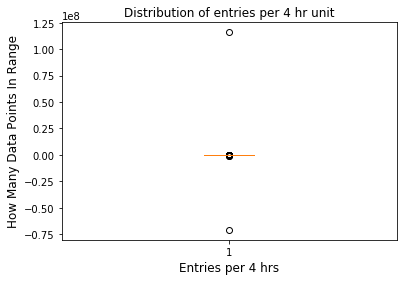

In [132]:
# Histogram of all entries by station for all 4 hr intervals
#plt.figure(figsize=(12,8))

plt.boxplot(df_3.entries_diff)
# customize plot
plt.xlabel('Entries per 4 hrs', fontsize='large')
plt.ylabel('How Many Data Points In Range', fontsize='large')
plt.title('Distribution of entries per 4 hr unit', fontsize='large')

plt.show()

In [136]:
df_station_cleaned2['year'] = df_station_cleaned2['date'].dt.year.copy()
df_station_2018 = df_station_cleaned2[df_station_cleaned2.year == 2018].copy()
print(df_station_2018.shape, df_station_cleaned2.shape, df_station_2018.shape[0] - df_station_cleaned2.shape[0])
#gdate = df_station_cleaned.groupby('date')
df_station_2018.head()


(77455, 14) (79468, 14) -2013


,c_a,unit,scp,station,line_name,division,date,time,description,entries,exits,entries_diff,exits_diff,year
49738,A033,R170,02-00-00,14 ST-UNION SQ,LNQR456W,BMT,2018-12-28,20:00:00,REGULAR,2056902,5179086,327.0,327.0,2018
40335,A033,R170,02-00-00,14 ST-UNION SQ,LNQR456W,BMT,2018-12-28,16:00:00,REGULAR,2056575,5178313,202.0,202.0,2018
30260,A033,R170,02-00-00,14 ST-UNION SQ,LNQR456W,BMT,2018-12-28,12:00:00,REGULAR,2056373,5177665,87.0,87.0,2018
18957,A033,R170,02-00-00,14 ST-UNION SQ,LNQR456W,BMT,2018-12-28,08:00:00,REGULAR,2056286,5177145,12.0,12.0,2018
9473,A033,R170,02-00-00,14 ST-UNION SQ,LNQR456W,BMT,2018-12-28,04:00:00,REGULAR,2056274,5177048,6.0,6.0,2018


We have removed 2013 non-2018 entries from this dataframe.

In [137]:
df_station_2018.sort_values('entries_diff')

,c_a,unit,scp,station,line_name,division,date,time,description,entries,exits,entries_diff,exits_diff,year
1853539,R221,R170,01-06-01,14 ST-UNION SQ,456LNQRW,IRT,2018-10-25,17:00:00,REGULAR,656079,493,-70975867.0,-70975867.0,2018
5815648,A033,R170,02-06-00,14 ST-UNION SQ,LNQR456W,BMT,2018-05-30,05:00:00,REGULAR,524296,19,-1011649.0,-1011649.0,2018
8926792,A035,R170,00-00-00,14 ST-UNION SQ,LNQR456W,BMT,2018-02-02,12:00:00,REGULAR,56,167,-849618.0,-849618.0,2018
1575196,R221,R170,01-06-01,14 ST-UNION SQ,456LNQRW,IRT,2018-11-10,00:00:00,REGULAR,9266,7120,-532789.0,-532789.0,2018
7537964,A035,R170,00-00-01,14 ST-UNION SQ,LNQR456W,BMT,2018-03-30,09:00:00,REGULAR,3,17,-211581.0,-211581.0,2018
1796217,R221,R170,01-06-01,14 ST-UNION SQ,456LNQRW,IRT,2018-10-27,17:00:00,REGULAR,524720,382,-136701.0,-136701.0,2018
90356,R221,R170,01-06-01,14 ST-UNION SQ,456LNQRW,IRT,2018-12-27,12:00:00,REGULAR,98,128,-134165.0,-134165.0,2018
8300745,A034,R170,03-03-02,14 ST-UNION SQ,LNQR456W,BMT,2018-02-24,08:00:45,REGULAR,10027706,1099373,-1.0,-1.0,2018
8871673,R221,R170,01-05-01,14 ST-UNION SQ,456LNQRW,IRT,2018-02-04,12:00:00,REGULAR,3,3163,0.0,0.0,2018
5231152,R221,R170,01-05-01,14 ST-UNION SQ,456LNQRW,IRT,2018-06-20,09:00:00,REGULAR,3,3248,0.0,0.0,2018


In [81]:
gdate_entries = df_station_2018.groupby(["date", "time"]).entries_since_last_audit.sum().reset_index().copy()
gdate_exits = df_station_2018.groupby(["date", "time"]).exits_since_last_audit.sum().reset_index().copy()


#gdate = df_station_2018.groupby(["date", "time"]).amount.sum().reset_index().sort_values("amount", ascending=False)
#gdate = df_station_2018.groupby(['date','time'])
gdate = pd.concat([gdate_entries, gdate_exits.exits_since_last_audit], axis = 1).copy()
gdate = gdate.sort_values("date", ascending=False)
gdate.head(40)


,date,time,entries_since_last_audit,exits_since_last_audit
2127,2018-12-28,20:00:00,26018.0,18237.0
2126,2018-12-28,16:00:00,19063.0,18993.0
2125,2018-12-28,12:00:00,7774.0,16034.0
2124,2018-12-28,11:09:45,787.0,1268.0
2123,2018-12-28,08:00:00,1794.0,6150.0
2122,2018-12-28,04:00:00,2559.0,904.0
2121,2018-12-28,00:00:00,15888.0,6068.0
2120,2018-12-27,20:00:00,31168.0,19600.0
2119,2018-12-27,16:00:00,20794.0,21533.0
2118,2018-12-27,12:00:00,-125481.0,-70424.0


**PART 1

* What does your data contain and what is its background? 
This dataset is titled NYS Turnstile Data Usage and comes from the New York State Open Data project. It is maintained and updated by Kaggle and can be retrieved at this link: https://www.kaggle.com/new-york-state/nys-turnstile-usage-data/. The dataset we have executed our code on was downloaded on July 3rd, 2019.

As the title suggests, it contains the number of entries and exits of turnstiles from different stations. This data is organized my control area (C/A), unit, subunit-channel-position(SCP), line, division, date and time and is retrieved (usually) at 4 hr intervals. 

* Where does it come from? Why is it interesting or significant? 
A whole host of questions can be asked from this dataset, especially for determining what stations are most busy and in what direction (are people mostly leaving the station or mostly entering the station) and how that can fluxuate throughout the day.

* Conduct summary statistics and produce visualizations for the particular variables from the dataset that you will use.

* What variables does your data contain and what distributions do you think they have? 
Variables in my data are entries and exits and the rest of the columns allow us to arrange the data by place or time. 

* Does the data bear on the preliminary questions you wrote down? 

* What new questions might you answer? How does the data look when you plot it out?

**PART 2

* Ask three analytic questions and answer each one with a combination of statistics and visualizations. These analytic questions can focus on individuals behaviors or comparisons of the population.

Which station had the most entries
Which day was the busiest in each station
What time was the busiest in a particular day



In [143]:
#To determine issue: I wrote the code below to be able to 
#search by specific day and time and check for the root of the errors.

date = "2018-05-10"
time1 = "13:00:00"
time2 = "17:00:00"

df_date = df_station_2018[(df_station_2018["date"] == date)]
df_bytime1 = df_date[(df_date["time"] == time1)]
df_bytime2 = df_date[(df_date["time"] == time2)]
df_bytime = pd.concat([df_bytime1, df_bytime2]).copy()
df_bytime = df_bytime.sort_values(by=['station', 'scp', 'date', 'time'],ascending = [True, True, False, False])

df_bytime

,c_a,unit,scp,station,line_name,division,date,time,description,entries,exits,entries_since_last_audit,exits_since_last_audit,year
6393263,A035,R170,00-00-00,14 ST-UNION SQ,LNQR456W,BMT,2018-05-10,17:00:00,REGULAR,44060,84147,127.0,228.0,2018
6388609,A035,R170,00-00-00,14 ST-UNION SQ,LNQR456W,BMT,2018-05-10,13:00:00,REGULAR,43933,83919,72.0,207.0,2018
6393266,A035,R170,00-00-01,14 ST-UNION SQ,LNQR456W,BMT,2018-05-10,17:00:00,REGULAR,27893,96020,277.0,639.0,2018
6388611,A035,R170,00-00-01,14 ST-UNION SQ,LNQR456W,BMT,2018-05-10,13:00:00,REGULAR,27616,95381,120.0,663.0,2018
6393264,A035,R170,00-00-02,14 ST-UNION SQ,LNQR456W,BMT,2018-05-10,17:00:00,REGULAR,330147,740977,524.0,729.0,2018
6388610,A035,R170,00-00-02,14 ST-UNION SQ,LNQR456W,BMT,2018-05-10,13:00:00,REGULAR,329623,740248,192.0,1009.0,2018
6393262,A035,R170,00-00-03,14 ST-UNION SQ,LNQR456W,BMT,2018-05-10,17:00:00,REGULAR,3227781,2667396,922.0,338.0,2018
6388608,A035,R170,00-00-03,14 ST-UNION SQ,LNQR456W,BMT,2018-05-10,13:00:00,REGULAR,3226859,2667058,460.0,687.0,2018
6393265,A035,R170,00-00-04,14 ST-UNION SQ,LNQR456W,BMT,2018-05-10,17:00:00,REGULAR,893804,160005,1325.0,108.0,2018
6388607,A035,R170,00-00-04,14 ST-UNION SQ,LNQR456W,BMT,2018-05-10,13:00:00,REGULAR,892479,159897,903.0,221.0,2018
